In [53]:
# To ensure that you have all the libraries installed, make sure this cell runs properly.
from xml.dom import minidom
import pandas as pd
import matplotlib
import numpy as np
from geopy.distance import geodesic

In [54]:
files = ['Bashundara_RA.osm', 'Dhanmondi.osm', 'Nakhalpara.osm', 'Mirpur.osm', 'Rampura.osm', 'Mogbazar.osm', 'Cantonment.osm', 'DU_Nilkhet.osm', 'Chankharpool.osm',  'Mohammadpur.osm', 'Shahbag.osm']
# 'Gabtoli.osm',  
dict_of_locations = {}
list_of_locations = []
dict_of_locations['latitude'] = []
dict_of_locations['longitude'] = []



In [55]:
for filename in files:
    np.random.seed(1)
    xmldoc = minidom.parse('./data/' + filename)
    location_xml = xmldoc.getElementsByTagName('node')
    print(len(location_xml))
    for location in location_xml:
        if np.random.rand() < .0004:
            dict_of_locations['latitude'].append(float(location.attributes['lat'].value))
            dict_of_locations['longitude'].append(float(location.attributes['lon'].value))

            list_of_locations.append([float(location.attributes['lat'].value), float(location.attributes['lon'].value)])
            
    print(len(list_of_locations))

21163
12
44595
32
28492
48
42426
68
41371
88
28772
104
28505
120
9902
126
30242
142
45227
162
18554
173


In [56]:
dataframe = pd.DataFrame(data = dict_of_locations)

In [57]:
dataframe.head()

,latitude,longitude
0,23.816826,90.406408
1,23.824691,90.415939
2,23.825535,90.416480
3,23.836510,90.424908
4,23.836900,90.424291


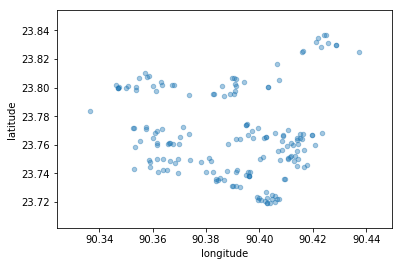

In [58]:
dataframe.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)


In [59]:
type(dataframe.iloc[0]['latitude'])

numpy.float64

In [60]:
np.random.rand()

0.8757514255572759

In [61]:
print(dataframe.describe())

         latitude   longitude
count  173.000000  173.000000
mean    23.766580   90.389419
std      0.030054    0.023054
min     23.719012   90.336471
25%     23.744505   90.367186
50%     23.762457   90.392771
75%     23.795438   90.408472
max     23.836900   90.437144


In [62]:
len(dict_of_locations['latitude'])

173

In [63]:
def dist(pointa, pointb):
    a = (pointa[0], pointa[1])
    b = (pointb[0], pointb[1])
    return - geodesic(a, b).miles ** 2

In [64]:
dist(list_of_locations[0], list_of_locations[1])

-0.6572001905950084

In [65]:
affinity_matrix = np.zeros((len(list_of_locations), len(list_of_locations)))
for i in range(len(list_of_locations)):
    for j in range(len(list_of_locations)):
        if i != j:
            affinity_matrix[i][j] = dist(list_of_locations[i], list_of_locations[j])


In [66]:
np.min(affinity_matrix)

-67.45569166868651

In [67]:
from sklearn.cluster import AffinityPropagation

In [68]:
af = AffinityPropagation( affinity='precomputed', preference = np.min(affinity_matrix)).fit(affinity_matrix)
labels = af.labels_

In [69]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([13, 49, 35, 37, 39]))

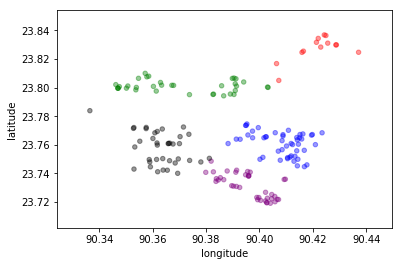

In [70]:
colors= ['red','blue','green', 'black','purple','orange','cyan','magenta','yellow','grey','pink','violet']
colorList = list()
for i in labels:
    colorList.append(colors[i])
dataframe.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,color = colorList)
